In [1]:
import pandas as pd
import csv

# Daten importieren
Die verwendeten Datensets beinhalten die Informationen der täglichen Handelspreise der malaysischen Goldbarrenmünze Kijang Emas mit 689 Beobachtungen seit 2018 bis Oktober 2020.

In [2]:
df = pd.read_excel ('kijangemas_quelle.xlsx')
print (df)
print(df.columns.ravel())

          Date  1 oz Sell  1 oz Buy  1/2 oz Sell  1/2 oz Buy  1/4 oz Sell  \
0   2018-01-03     5632.0    5415.0       2869.0      2708.0       1461.0   
1   2018-01-04     5579.0    5362.0       2842.0      2681.0       1447.0   
2   2018-01-05     5608.0    5391.0       2857.0      2696.0       1455.0   
3   2018-01-08     5585.0    5371.0       2845.0      2685.0       1449.0   
4   2018-01-09     5592.0    5377.0       2849.0      2688.0       1451.0   
..         ...        ...       ...          ...         ...          ...   
684 2020-10-23     8372.0    8047.0       4265.0      4023.0       2172.0   
685 2020-10-26     8386.0    8044.0       4272.0      4022.0       2176.0   
686 2020-10-27     8413.0    8086.0       4286.0      4043.0       2183.0   
687 2020-10-28     8424.0    8087.0       4292.0      4043.0       2186.0   
688 2020-10-30     8245.0    7915.0       4200.0      3957.0       2139.0   

     1/4 oz Buy  
0        1354.0  
1        1341.0  
2        1348.0  
3  

In [3]:
df.head(21)

,Date,1 oz Sell,1 oz Buy,1/2 oz Sell,1/2 oz Buy,1/4 oz Sell,1/4 oz Buy
0,2018-01-03,5632.0,5415.0,2869.0,2708.0,1461.0,1354.0
1,2018-01-04,5579.0,5362.0,2842.0,2681.0,1447.0,1341.0
2,2018-01-05,5608.0,5391.0,2857.0,2696.0,1455.0,1348.0
3,2018-01-08,5585.0,5371.0,2845.0,2685.0,1449.0,1343.0
4,2018-01-09,5592.0,5377.0,2849.0,2688.0,1451.0,1344.0
5,2018-01-10,5577.0,5359.0,2841.0,2680.0,1447.0,1340.0
6,2018-01-11,5599.0,5381.0,2853.0,2691.0,1453.0,1345.0
7,2018-01-12,5584.0,5369.0,2844.0,2684.0,1449.0,1342.0
8,2018-01-15,5622.0,5403.0,2864.0,2701.0,1458.0,1351.0
9,2018-01-16,5627.0,5409.0,2867.0,2705.0,1460.0,1352.0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In dieser Arbeit wird der Verkaufspreis für 1 oz Gold betrachtet

In [5]:
timestamp, selling = [], []  
timestamp = pd.DatetimeIndex(df['Date']).date
selling = selling = df["1 oz Sell"]
dfges = pd.DataFrame({'timestamp': timestamp, 'selling': selling})
len(timestamp), len(selling)

(689, 689)

# Data Analysis

### Verteilungsanalyse

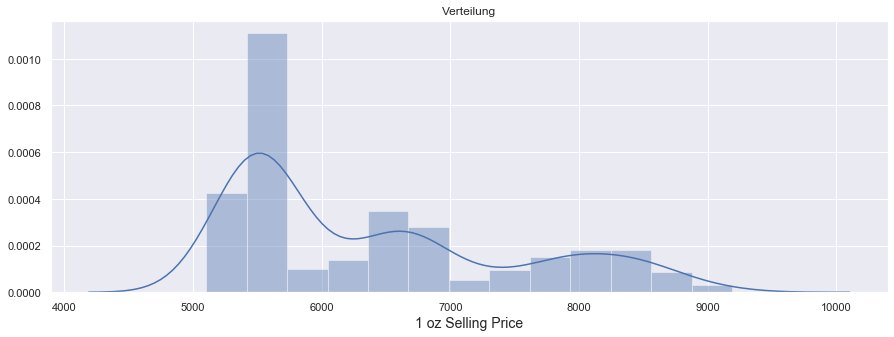

In [6]:
plt.figure(figsize = (15, 5))
sns.distplot(selling)
plt.xlabel("1 oz Selling Price", fontsize = 14)
plt.title("Verteilung")
plt.show()

### Lagging Analyse
A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. To see how similar the time series with itself.

Lag/Shift 5 days means we shift the time by 5 before comparing to itself.

In [7]:
def df_shift(df, lag = 0, start = 1, skip = 1, rejected_columns = []):
    df = df.copy()
    if not lag:
        return df
    cols = {}
    for i in range(start, lag + 1, skip):
        for x in list(df.columns):
            if x not in rejected_columns:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k, v in cols.items():
        columns = v
        dfn = pd.DataFrame(data = None, columns = columns, index = df.index)
        i = start - 1
        for c in columns:
            dfn[c] = df[k].shift(periods = i)
            i += skip
        df = pd.concat([df, dfn], axis = 1, join_axes = [df.index])
    return df

shifting until 13 units, start at 1 units shifted, skip every 4 units

In [8]:
df_crosscorrelated = df_shift(
    dfges, lag = 16, start = 1, skip = 5, rejected_columns = ['timestamp']
)
df_crosscorrelated['ma5'] = df_crosscorrelated['selling'].rolling(5).mean()
df_crosscorrelated['ma10'] = df_crosscorrelated['selling'].rolling(10).mean()
df_crosscorrelated['ma15'] = df_crosscorrelated['selling'].rolling(15).mean()

C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.


In [9]:
df_crosscorrelated.head(21) #selling_5 wir vergleichen unit 5 mit dem unit 1

,timestamp,selling,selling_1,selling_6,selling_11,selling_16,ma5,ma10,ma15
0,2018-01-03,5632.0,5632.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-04,5579.0,5579.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-05,5608.0,5608.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-08,5585.0,5585.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-09,5592.0,5592.0,NaN,NaN,NaN,5599.2,NaN,NaN
5,2018-01-10,5577.0,5577.0,5632.0,NaN,NaN,5588.2,NaN,NaN
6,2018-01-11,5599.0,5599.0,5579.0,NaN,NaN,5592.2,NaN,NaN
7,2018-01-12,5584.0,5584.0,5608.0,NaN,NaN,5587.4,NaN,NaN
8,2018-01-15,5622.0,5622.0,5585.0,NaN,NaN,5594.8,NaN,NaN
9,2018-01-16,5627.0,5627.0,5592.0,NaN,NaN,5601.8,5600.5,NaN


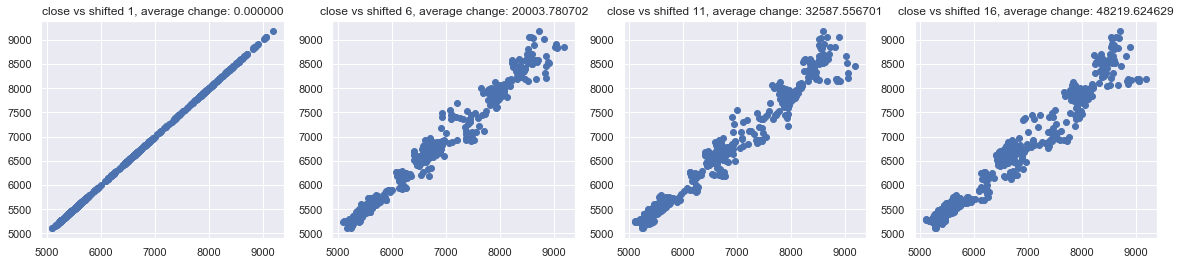

In [10]:
plt.figure(figsize = (20, 4))
plt.subplot(1, 4, 1)
plt.scatter(df_crosscorrelated['selling'], df_crosscorrelated['selling_1'])
mse = (
    (df_crosscorrelated['selling_1'] - df_crosscorrelated['selling']) ** 2
).mean()
plt.title('close vs shifted 1, average change: %f'%(mse))
plt.subplot(1, 4, 2)
plt.scatter(df_crosscorrelated['selling'], df_crosscorrelated['selling_6'])
mse = (
    (df_crosscorrelated['selling_6'] - df_crosscorrelated['selling']) ** 2
).mean()
plt.title('close vs shifted 6, average change: %f'%(mse))
plt.subplot(1, 4, 3)
plt.scatter(df_crosscorrelated['selling'], df_crosscorrelated['selling_11'])
mse = (
    (df_crosscorrelated['selling_11'] - df_crosscorrelated['selling']) ** 2
).mean()
plt.title('close vs shifted 11, average change: %f'%(mse))
plt.subplot(1, 4, 4)
plt.scatter(df_crosscorrelated['selling'], df_crosscorrelated['selling_16'])
mse = (
    (df_crosscorrelated['selling_16'] - df_crosscorrelated['selling']) ** 2
).mean()
plt.title('close vs shifted 16, average change: %f'%(mse))
plt.show()

Die MSE wird größer und größer: this show how quick for a random time series to become unsimilar with itself

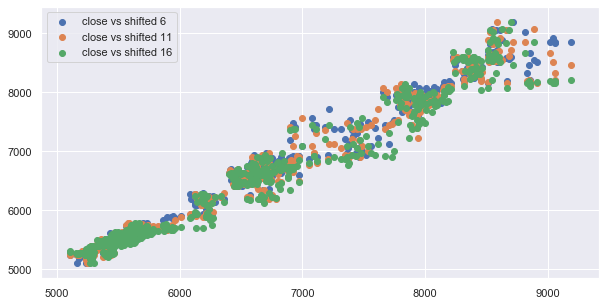

In [11]:
plt.figure(figsize = (10, 5))
plt.scatter(
    df_crosscorrelated['selling'],
    df_crosscorrelated['selling_6'],
    label = 'close vs shifted 6',
)
plt.scatter(
    df_crosscorrelated['selling'],
    df_crosscorrelated['selling_11'],
    label = 'close vs shifted 11',
)
plt.scatter(
    df_crosscorrelated['selling'],
    df_crosscorrelated['selling_16'],
    label = 'close vs shifted 16',
)
plt.legend()
plt.show()

Moving averages are a simple and common type of smoothing used in time series analysis and time series forecasting.

Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series.

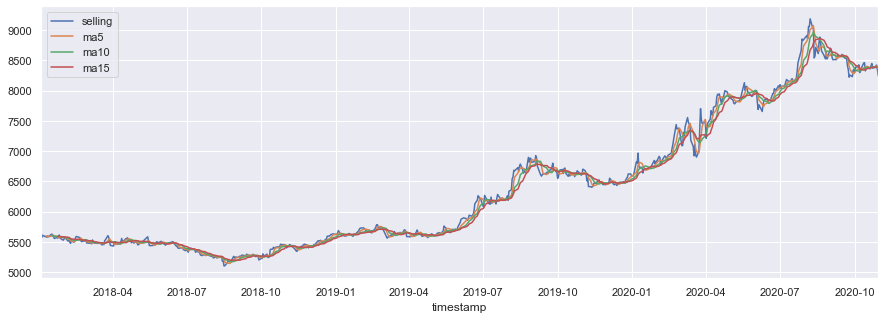

In [12]:
fig, ax = plt.subplots(figsize = (15, 5))
df_crosscorrelated.plot(
    x = 'timestamp', y = ['selling', 'ma5', 'ma10', 'ma15'], ax = ax
)

### Korrelationsanalyse

We want to study linear relationship between, how many days required to give impact to future sold units?

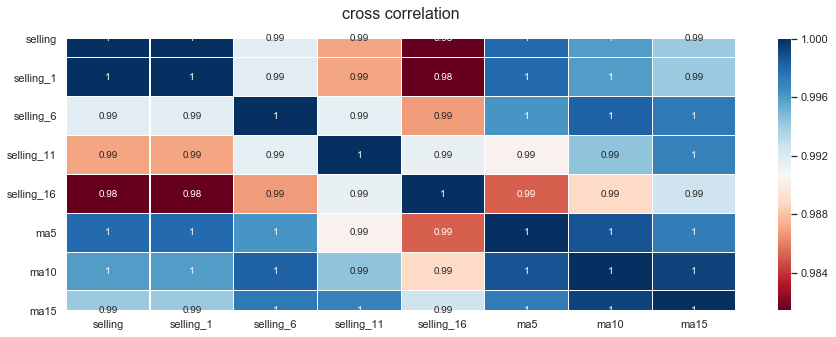

In [13]:
colormap = plt.cm.RdBu
plt.figure(figsize = (15, 5))
plt.title('cross correlation', y = 1.05, size = 16)

sns.heatmap(
    df_crosscorrelated.iloc[:, 1:].corr(),
    linewidths = 0.1,
    vmax = 1.0,
    cmap = colormap,
    linecolor = 'white',
    annot = True,
)
plt.show()

# Stationarität Analysis
2 Methoden, um  die Stationarität zu überprüfen, werden in dieser Arbeit implementiert: Summary statistic und Augmented Dickey-Fuller test

#### 1. Summary Statistics : Mean, Variance

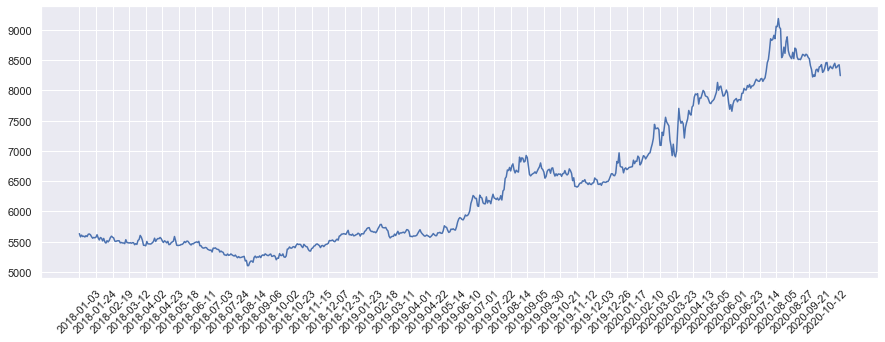

In [14]:
plt.figure(figsize = (15, 5))
plt.plot(selling)
plt.xticks(np.arange(len(timestamp))[::15], timestamp[::15], rotation = '45')
plt.show()

Hier ist es grob ersichtlich dass ab Anfang 2019 ein Trend gibt. Eine schnelle Überprüfung, um festzustellen, ob eine Zeitreihe nicht stationär ist, ist der Mittelwert und die Varianz zu berechnet.

Wir können die Zeitreihen in zwei (oder mehr) Partitionen aufteilen und den Mittelwert und die Varianz jeder Gruppe vergleichen. Wenn sie sich unterscheiden und der Unterschied statistisch signifikant ist, ist die Zeitreihe wahrscheinlich nicht stationär.

In [15]:
X = selling.values
split = round(len(X) / 2)
Half1, Half2 = X[0:split], X[split:]
time1, time2 = timestamp[0:split], timestamp[split:]
meanH1, meanH2 = Half1.mean(), Half2.mean()
varH1, varH2 = Half1.var(), Half2.var()
print('meanH1=%f, meanH2=%f' % (meanH1, meanH2))
print('varianceH1=%f, varianceH2=%f' % (varH1, varH2))

meanH1=5494.976744, meanH2=7290.466667
varianceH1=22011.400622, varianceH2=739592.440193


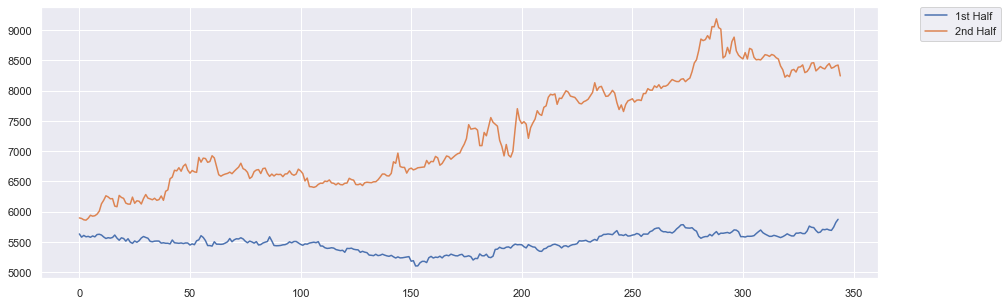

In [16]:
plt.figure(figsize = (15, 5))
plt.plot(Half1, label="1st Half")
plt.plot(Half2, label= "2nd Half")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Nach der Berechnung von Mittelwert und Varianz können wir sehen dass es eine signifikante Unterschied im Wert gibt. 
Im Plot ist es ersichtlich dass die Linie von der ersten Hälfte flach aussieht während die von der zweiten Hälfte steigt.

In [17]:
X = selling.values
split = round(len(X) / 4)
Q1, Q2, Q3, Q4 = X[0:split], X[split: 2*split], X[2*split: 3*split], X[3*split:]
meanQ1, meanQ2, meanQ3, meanQ4 = Q1.mean(), Q2.mean(), Q3.mean(), Q4.mean()
varQ1, varQ2, varQ3, varQ4 = Q1.var(), Q2.var(), Q3.var(), Q4.var()
print('meanQ1=%f, meanQ2=%f, meanQ3=%f, meanQ4=%f' % (meanQ1, meanQ2, meanQ3, meanQ4))
print('varianceQ1=%f, varianceQ2=%f, varianceQ3=%f, varianceQ4=%f' % (varQ1, varQ2, varQ3, varQ4))

meanQ1=5431.558140, meanQ2=5558.395349, meanQ3=6529.476744, meanQ4=8047.057803
varianceQ1=15445.048945, varianceQ2=20533.913467, varianceQ3=68845.551785, varianceQ4=258273.800127


#### 2. Statistical Test : Augmented Dickey-Fuller test

In [18]:
dfges = pd.DataFrame({'timestamp': timestamp, 'selling': selling})
df1 = pd.DataFrame({'timestamp1': time1, 'selling1': Half1})
df2 = pd.DataFrame({'timestamp2': time2, 'selling2': Half2})
gesdiff = dfges.diff()
diff2 = df2.diff()
sellges = gesdiff["selling"].values
sell2 = diff2["selling2"].values
sellges[0] = 0
sell2[0] = 0

In [19]:
from statsmodels.tsa.stattools import adfuller

def ADF_Test(time_series):
    result = adfuller(time_series, autolag = 'AIC')
    print('\033[01m' + '\033[04m' + 'Augmented Dicky-Fuller Test' + '\033[0m')
    labels = ['ADF Test Statistics', 'p-value', '# Lags used', '# Observations used']
    
    for value, label in zip(result, labels):
        print(label + ': ' + str(value))
   
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.4f' % (key, value))
        
    if result[1] <= 0.05:
        print('\033[01m' + '\033[91m' + 'Reject the null hypothesis!' + '\033[0m')
        print('Data has no unit root and the time series is stationary.')
    else:
        print('\033[01m' + '\033[91m' + "Fail to reject the null hypothesis!" + '\033[0m')
        print('Data has a unit root and the time series is non-stationary.')

In [20]:
ADF_Test(dfges['selling'])
ADF_Test(df1['selling1'])
ADF_Test(df2['selling2'])

Augmented Dicky-Fuller Test
ADF Test Statistics: 0.3488041932349406
p-value: 0.9794760761399782
# Lags used: 16
# Observations used: 672
Critical Values:
	1%: -3.4401
	5%: -2.8659
	10%: -2.5691
Fail to reject the null hypothesis!
Data has a unit root and the time series is non-stationary.
Augmented Dicky-Fuller Test
ADF Test Statistics: -0.3745262172422298
p-value: 0.9142658940726227
# Lags used: 8
# Observations used: 335
Critical Values:
	1%: -3.4500
	5%: -2.8702
	10%: -2.5714
Fail to reject the null hypothesis!
Data has a unit root and the time series is non-stationary.
Augmented Dicky-Fuller Test
ADF Test Statistics: -1.3077768915694514
p-value: 0.625606908236248
# Lags used: 0
# Observations used: 344
Critical Values:
	1%: -3.4495
	5%: -2.8700
	10%: -2.5713
Fail to reject the null hypothesis!
Data has a unit root and the time series is non-stationary.


Laut der p-values sind aber alle 3 Dateien (gesamt, 1st Half und 2nd Half) nicht stationär.
# Datei Manipulatioin - Detrending & Decomposition

Trendbereinigung der Zeitreihe (Detrending)

1. Transformationen: Log Transformation, Square Root Transformation, Cubed Root Transformation
2. Gleitender Durchschnitt zur Glättung der Zeitreihe: Simple Rolling Mean und gewichtete Rolling Mean
3. Differenzierung der Zeitreihe

Zerlegung der Zeitreihe (Decomposition)
1. additive Zerlegung
2. multiplikative Zerlegung

In [21]:
df3 = dfges.set_index('timestamp')
df3.head()

,selling
timestamp,
2018-01-03,5632.0
2018-01-04,5579.0
2018-01-05,5608.0
2018-01-08,5585.0
2018-01-09,5592.0


## 1. Transformationen
Log Transformation, Square Root Transformation, Cubed Root Transformation

In [22]:
# Berechne den Logarithmus der Verkaufspreise
df3['selling_log'] = np.log(df3['selling'])

# Berechne die Quadratwurzel der Verkaufspreise
df3['selling_sqrt'] = np.sqrt(df3['selling'])

# Berechne die dritte Wurzel der Verkaufspreise
df3['selling_cbrt'] = np.cbrt(df3['selling'])

df3.head()

,selling,selling_log,selling_sqrt,selling_cbrt
timestamp,,,,
2018-01-03,5632.0,8.636220,75.046652,17.791841
2018-01-04,5579.0,8.626765,74.692704,17.735855
2018-01-05,5608.0,8.631949,74.886581,17.766532
2018-01-08,5585.0,8.627840,74.732858,17.742210
2018-01-09,5592.0,8.629092,74.779676,17.749620


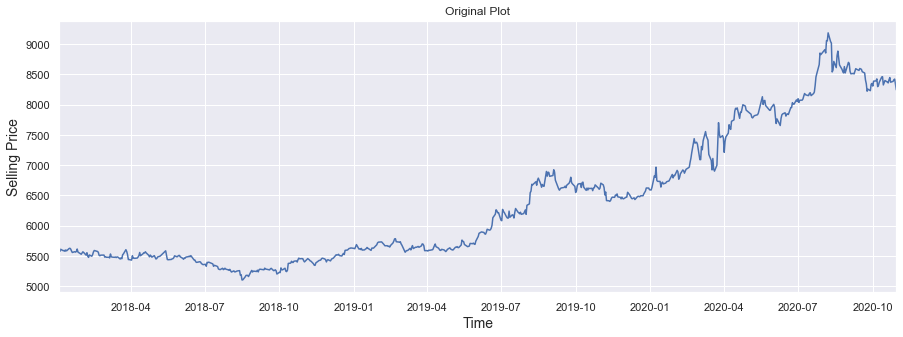

In [23]:
df3['selling'].plot(figsize = (15, 5))
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Selling Price", fontsize = 14)
plt.title("Original Plot")
plt.show()

### 1.1. Log Transformation

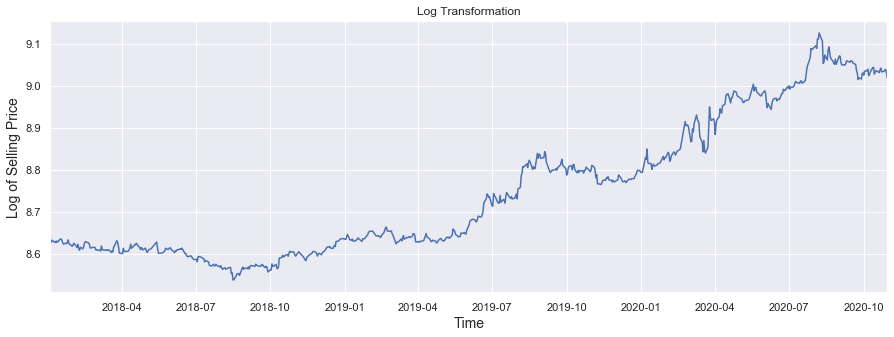

In [24]:
df3['selling_log'].plot(figsize = (15, 5))
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Log of Selling Price", fontsize = 14)
plt.title("Log Transformation")
plt.show()

### 1.2. Square Root Transformation

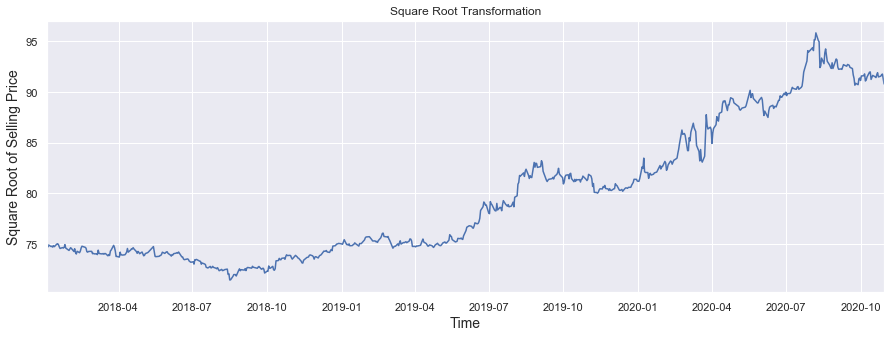

In [25]:
df3['selling_sqrt'].plot(figsize = (15, 5))
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Square Root of Selling Price", fontsize = 14)
plt.title("Square Root Transformation")
plt.show()

### 1.3. Cube Root Transformation

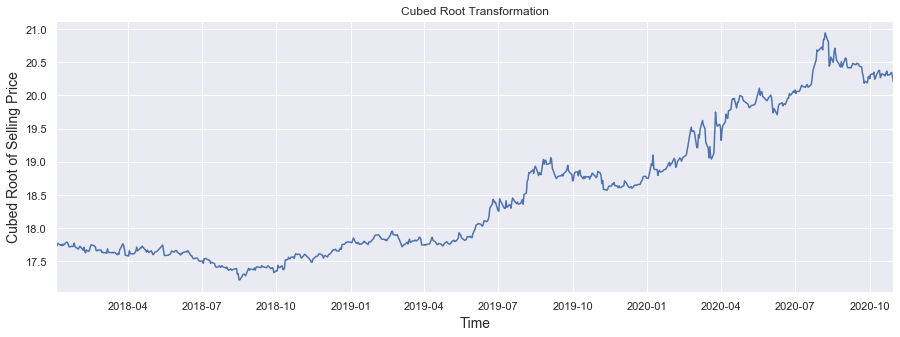

In [26]:
df3['selling_cbrt'].plot(figsize = (15, 5))
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Cubed Root of Selling Price", fontsize = 14)
plt.title("Cubed Root Transformation")
plt.show()

## 2. Subtracting The Rolling Mean From The Original

### 2.1. Einfacher gleitender Durchschnitt / Removing The Simple Rolling Mean

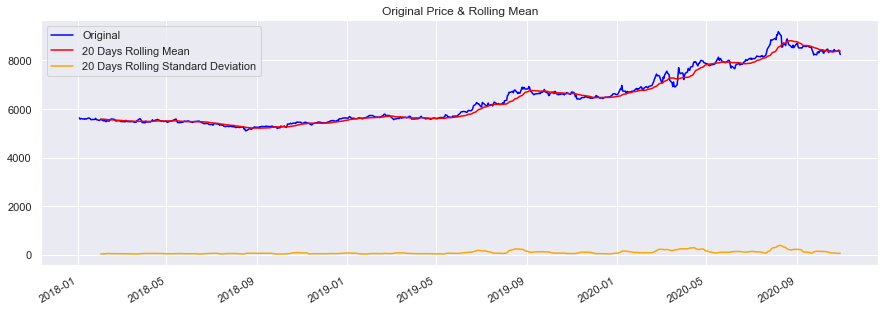

In [27]:
rolmean = df3['selling'].rolling(window = 20).mean()
rolstd = df3['selling'].rolling(window = 20).std()

fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(df3['selling'], color = 'blue', label = 'Original')
ax.plot(rolmean, color = 'red', label = '20 Days Rolling Mean')
ax.plot(rolstd, color = 'orange', label = '20 Days Rolling Standard Deviation')
ax.legend(loc = 'best')
plt.title('Original Price & Rolling Mean')
fig.autofmt_xdate()
plt.show(block = False)

In [28]:
# Subtrahiere den einfachen gleitenden Durchschnitt von den Originaldaten und überprüfe auf NaNs
data_minus_rolmean = df3['selling'] - rolmean
data_minus_rolmean[15:25]

timestamp
2018-01-24      NaN
2018-01-25      NaN
2018-01-26      NaN
2018-01-30      NaN
2018-02-01   -18.90
2018-02-02   -26.15
2018-02-05   -66.85
2018-02-06   -24.10
2018-02-07   -75.70
2018-02-08   -90.90
Name: selling, dtype: float64

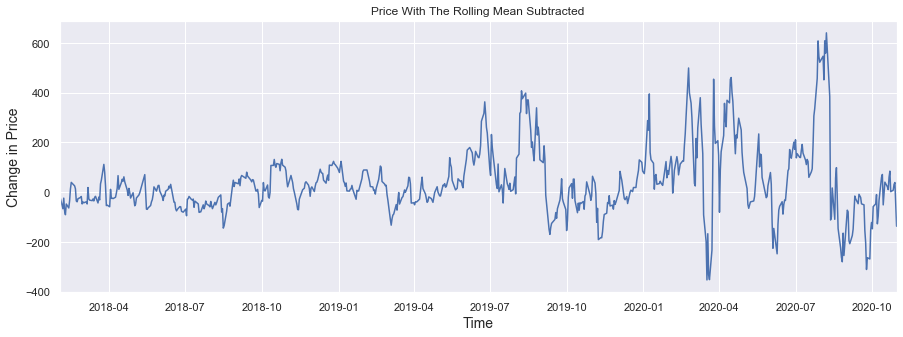

In [29]:
# Lösche die NaNs aus der oben berechneten Zeitreihe
data_minus_rolmean.dropna(inplace = True)

data_minus_rolmean.plot(figsize = (15, 5))
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Change in Price", fontsize = 14)
plt.title("Price With The Rolling Mean Subtracted")
plt.show()

Diese Zeitreihe scheint stationärer zu sein. Der Aufwärtstrend ist praktisch verschwunden, aber die Varianz ist immer noch offensichtlich.

In [30]:
ADF_Test(data_minus_rolmean)

Augmented Dicky-Fuller Test
ADF Test Statistics: -4.88060698523611
p-value: 3.8035775411477395e-05
# Lags used: 16
# Observations used: 653
Critical Values:
	1%: -3.4404
	5%: -2.8660
	10%: -2.5691
Reject the null hypothesis!
Data has no unit root and the time series is stationary.


### 2.2. Gewichteter gleitender Durchschnitt / Removing The Weighted Rolling Mean

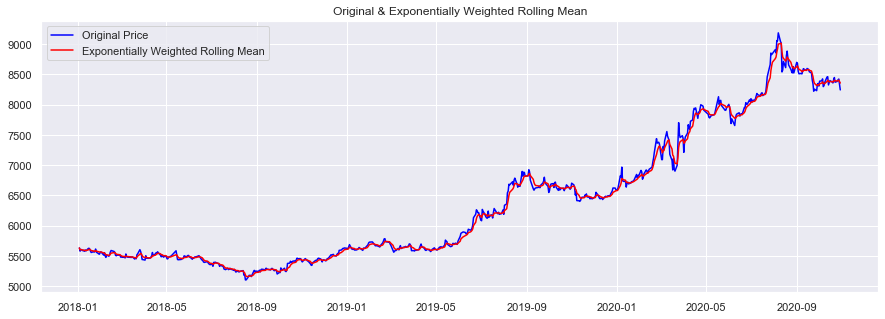

In [31]:
# Exponentiell geglätteter Durchschnitt / Exponentially Weighted Moving Average (EWMA)
exp_rolmean = df3['selling'].ewm(halflife = 2).mean()

fig, ax = plt.subplots(figsize = (15, 5))
orig = plt.plot(df3['selling'], color = 'blue', label = 'Original Price')
mean = plt.plot(exp_rolmean, color = 'red', label = 'Exponentially Weighted Rolling Mean')
plt.legend(loc = 'best')
plt.title('Original & Exponentially Weighted Rolling Mean')
plt.show(block = False)

In [32]:
# Subtrahiere den EWMA von den Originaldaten und überprüfe auf NaNs
data_minus_exp_rolmean = df3['selling'] - exp_rolmean
data_minus_exp_rolmean.head(15)

timestamp
2018-01-03     0.000000
2018-01-04   -21.953319
2018-01-05     3.853958
2018-01-08   -11.669048
2018-01-09    -3.007855
2018-01-10   -11.979994
2018-01-11     6.800662
2018-01-12    -5.637706
2018-01-15    22.445326
2018-01-16    19.147468
2018-01-17     4.306230
2018-01-18   -19.453701
2018-01-19   -31.288052
2018-01-22   -12.889429
2018-01-23   -14.031590
Name: selling, dtype: float64

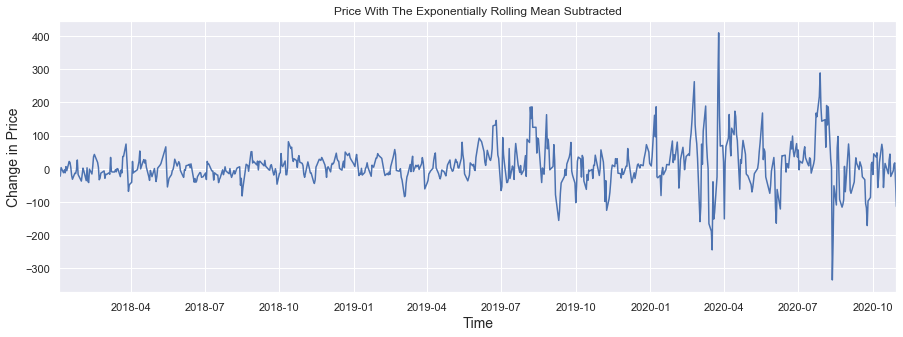

In [33]:
data_minus_exp_rolmean.plot(figsize = (15, 5))
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Change in Price", fontsize = 14)
plt.title("Price With The Exponentially Rolling Mean Subtracted")
plt.show()

In [34]:
ADF_Test(data_minus_exp_rolmean)

Augmented Dicky-Fuller Test
ADF Test Statistics: -5.817201994821855
p-value: 4.264974738911892e-07
# Lags used: 16
# Observations used: 672
Critical Values:
	1%: -3.4401
	5%: -2.8659
	10%: -2.5691
Reject the null hypothesis!
Data has no unit root and the time series is stationary.


## 3. Differenzierung
Die Differenzierung ist eine Methode zum Transformieren eines Zeitreihendatensatzes. Die Differenzierung erfolgt durch Subtrahieren der vorherigen Beobachtung von der aktuellen Beobachtung. Eine Differenzierung kann dazu beitragen, den Mittelwert der Zeitreihen zu stabilisieren, indem Änderungen im Pegel einer Zeitreihe entfernt werden und so Trend und Saisonalität eliminiert (oder reduziert) werden. Page 215, Forecasting: principles and practice.

In [35]:
data_diff = df3['selling'].diff(periods = 1) # data_diff = df3['selling'] - df3['selling'].shift(1)
data_diff.head(10)

timestamp
2018-01-03     NaN
2018-01-04   -53.0
2018-01-05    29.0
2018-01-08   -23.0
2018-01-09     7.0
2018-01-10   -15.0
2018-01-11    22.0
2018-01-12   -15.0
2018-01-15    38.0
2018-01-16     5.0
Name: selling, dtype: float64

In [36]:
data_diff.dropna(inplace = True)
data_diff.head(10)

timestamp
2018-01-04   -53.0
2018-01-05    29.0
2018-01-08   -23.0
2018-01-09     7.0
2018-01-10   -15.0
2018-01-11    22.0
2018-01-12   -15.0
2018-01-15    38.0
2018-01-16     5.0
2018-01-17   -13.0
Name: selling, dtype: float64

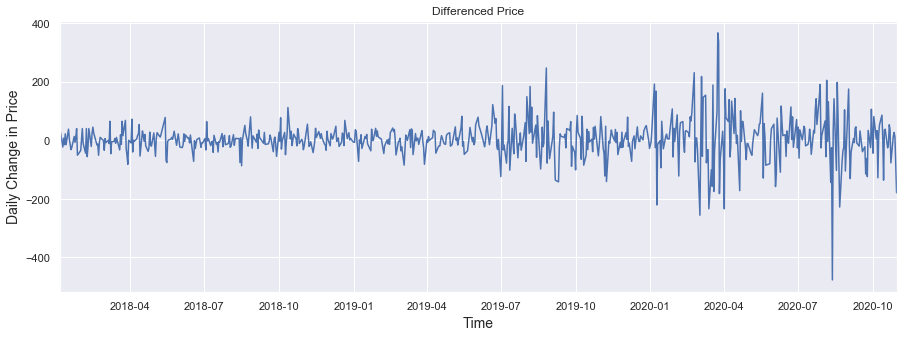

In [37]:
data_diff.plot(figsize = (15, 5))
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Daily Change in Price", fontsize = 14)
plt.title('Differenced Price')
plt.show(block = False)

Die Differenzierung beseitigte auch den Aufwärtstrend der Ursprungszeitreihe, die Varianz ist allerdings immer noch zeitabhängig.

In [38]:
ADF_Test(data_diff)

Augmented Dicky-Fuller Test
ADF Test Statistics: -6.676318614963384
p-value: 4.455910123839533e-09
# Lags used: 15
# Observations used: 672
Critical Values:
	1%: -3.4401
	5%: -2.8659
	10%: -2.5691
Reject the null hypothesis!
Data has no unit root and the time series is stationary.


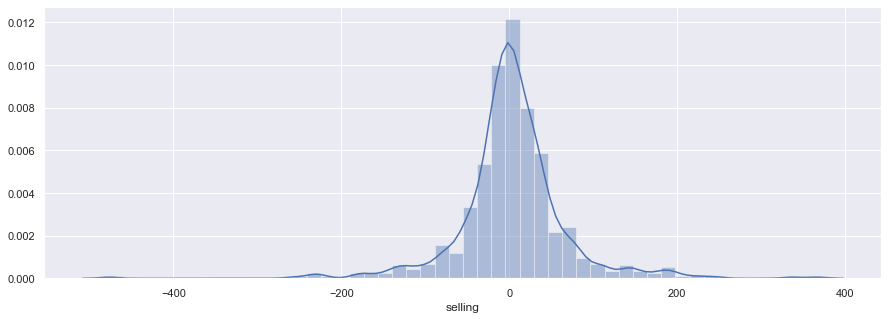

In [39]:
plt.figure(figsize = (15, 5))
sns.distplot(data_diff)
plt.show()

We clearly see the bell curve-like shape of the Gaussian distribution in the data 

# Predictive Modelling
# Lineare Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
#splitting the data into train and test dataset
#the training data is used to create the linear regression model, by pairing the input with the expected output
#the test data is used to estimate how well the model has been trained
train_selling= selling[:628] 
test_selling = selling[628:]

future_count = len(test_selling)
print(future_count) #predicting 61 days

61


In [42]:
%%time
linear_regression = LinearRegression().fit(
    np.arange(len(train_selling)).reshape((-1, 1)), train_selling
)
linear_future = linear_regression.predict(
    np.arange(len(train_selling) + future_count).reshape((-1, 1))
)

Wall time: 7.98 ms


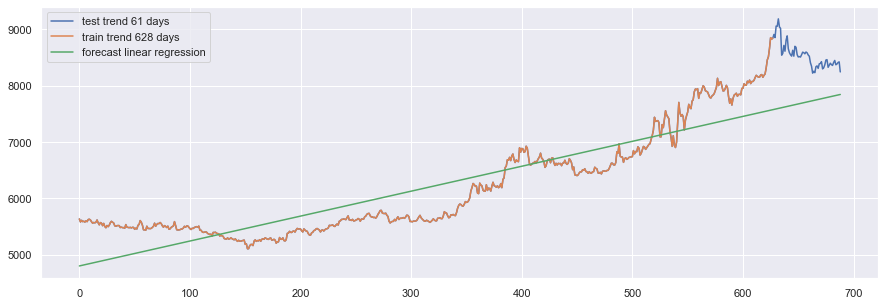

In [43]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(selling, label = 'test trend 61 days')
ax.plot(train_selling, label = 'train trend 628 days')
ax.plot(linear_future, label = 'forecast linear regression')
plt.legend()
plt.show()

In [44]:
train_sellingdiff= sellges[:628]
test_sellingdiff = sellges[628:]

future_countdiff = len(test_sellingdiff)
print(future_countdiff)

61


In [45]:
%%time
linear_regressiondiff = LinearRegression().fit(
    np.arange(len(train_sellingdiff)).reshape((-1, 1)), train_sellingdiff
)
linear_futurediff = linear_regressiondiff.predict(
    np.arange(len(train_sellingdiff) + future_countdiff).reshape((-1, 1))
)
linear_futurediff[0:21]

Wall time: 2.99 ms


array([-4.95109516, -4.91898244, -4.88686972, -4.854757  , -4.82264428,
       -4.79053156, -4.75841885, -4.72630613, -4.69419341, -4.66208069,
       -4.62996797, -4.59785526, -4.56574254, -4.53362982, -4.5015171 ,
       -4.46940438, -4.43729166, -4.40517895, -4.37306623, -4.34095351,
       -4.30884079])

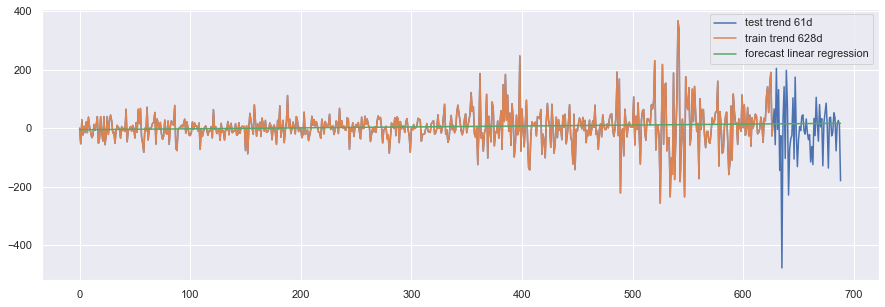

In [46]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(sellges, label = 'test trend 61d')
ax.plot(train_sellingdiff, label = 'train trend 628d')
ax.plot(linear_futurediff, label = 'forecast linear regression')
plt.legend()
plt.show()

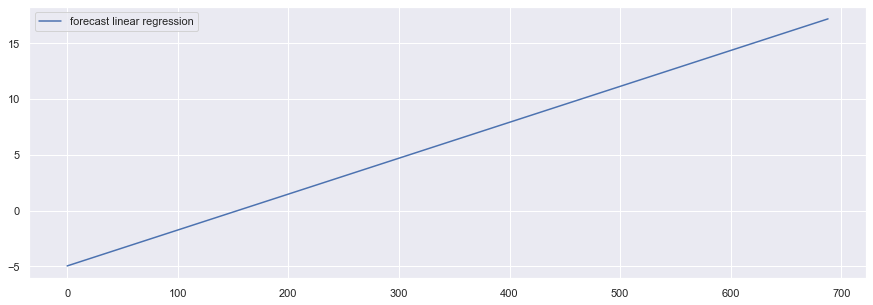

In [47]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(linear_futurediff, label = 'forecast linear regression')
plt.legend()
plt.show()

In [48]:
train_sellingrm = data_minus_rolmean[:609]
test_sellingrm = data_minus_rolmean[609:]

future_countrm = len(test_sellingrm)
print(future_countrm)

61


In [49]:
%%time
linear_regressionrm = LinearRegression().fit(
    np.arange(len(train_sellingrm)).reshape((-1, 1)), train_sellingrm
)
linear_futurerm = linear_regressionrm.predict(
    np.arange(len(train_sellingrm) + future_countrm).reshape((-1, 1))
)

linear_futurerm[0:21]

Wall time: 1e+03 µs


array([-34.36978196, -34.10884623, -33.8479105 , -33.58697477,
       -33.32603904, -33.06510331, -32.80416758, -32.54323185,
       -32.28229612, -32.02136039, -31.76042466, -31.49948893,
       -31.23855321, -30.97761748, -30.71668175, -30.45574602,
       -30.19481029, -29.93387456, -29.67293883, -29.4120031 ,
       -29.15106737])

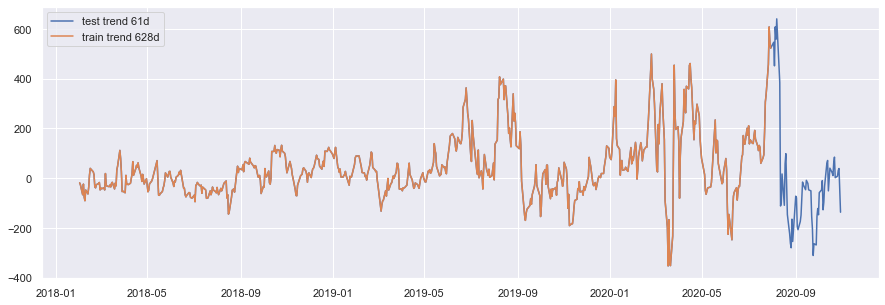

In [50]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(data_minus_rolmean, label = 'test trend 61d')
ax.plot(train_sellingrm, label = 'train trend 628d')
plt.legend()
plt.show()

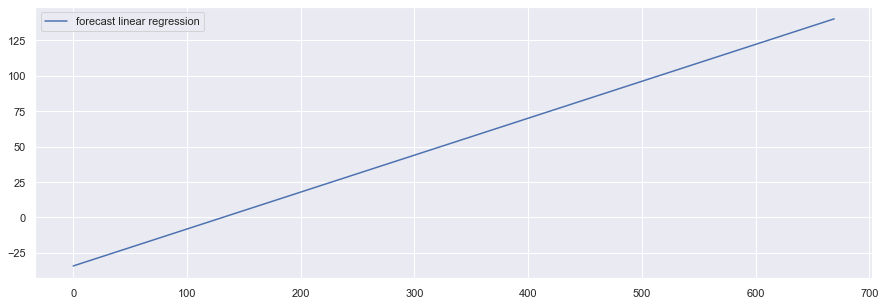

In [51]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(linear_futurerm, label = 'forecast linear regression')
plt.legend()
plt.show()

# ARIMA